# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Loading Data

In [2]:
df = pd.read_excel("/content/customer_churn_large_dataset.xlsx")
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


# Data Encoding

In [3]:
# Ecoded 0 for Femal and 1 for Male
df["Gender"] = df["Gender"].apply(lambda x: 0 if x == "Female" else 1)
df.sample(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
86607,86608,Customer_86608,56,1,Chicago,21,55.91,83,1
68308,68309,Customer_68309,47,1,Los Angeles,13,65.99,305,1
54253,54254,Customer_54254,50,1,Los Angeles,14,95.26,217,1
96836,96837,Customer_96837,47,0,New York,4,41.45,213,1
56035,56036,Customer_56036,32,0,New York,12,71.66,65,1


In [4]:
# Encoding categorial variable ie.location
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()


df["Location"] = OE.fit_transform(df[["Location"]])
Loc = OE.categories_
Loc

[array(['Chicago', 'Houston', 'Los Angeles', 'Miami', 'New York'],
       dtype=object)]

In [5]:
df.sample(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
74315,74316,Customer_74316,69,0,4.0,22,73.62,324,0
85621,85622,Customer_85622,37,1,0.0,11,73.83,454,1
50514,50515,Customer_50515,28,0,2.0,11,93.79,364,1
17853,17854,Customer_17854,52,1,4.0,13,40.90,85,1
50203,50204,Customer_50204,46,1,4.0,14,58.18,93,1


# Data Segregation

In [6]:
X = df.iloc[:,2:-1].values
X

array([[ 63.  ,   1.  ,   2.  ,  17.  ,  73.36, 236.  ],
       [ 62.  ,   0.  ,   4.  ,   1.  ,  48.76, 172.  ],
       [ 24.  ,   0.  ,   2.  ,   5.  ,  85.47, 460.  ],
       ...,
       [ 64.  ,   1.  ,   0.  ,  17.  ,  96.11, 251.  ],
       [ 51.  ,   0.  ,   4.  ,  20.  ,  49.25, 434.  ],
       [ 27.  ,   0.  ,   2.  ,  19.  ,  76.57, 173.  ]])

In [7]:
Y = df.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 1, 1])

# Data Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = SS.fit_transform(X)
X

array([[ 1.24167039,  1.00432937,  0.00294695,  0.65111499,  0.41060598,
        -0.29428898],
       [ 1.17622625, -0.99568929,  1.41974758, -1.65887854, -0.80537409,
        -0.78485174],
       [-1.31065114, -0.99568929,  0.00294695, -1.08138015,  1.0092043 ,
         1.42268068],
       ...,
       [ 1.30711454,  1.00432937, -1.41385369,  0.65111499,  1.5351404 ,
        -0.17931334],
       [ 0.45634069, -0.99568929,  1.41974758,  1.08423877, -0.78115335,
         1.22338955],
       [-1.11431871, -0.99568929,  0.00294695,  0.93986418,  0.56927655,
        -0.7771867 ]])

# Data Splitting

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.1,random_state=1)

# Creating an object of early stopping to save the resources

In [24]:
ES = EarlyStopping(monitor='val_loss', mode='min', patience=1000)

# ANN Modelling

In [25]:
# obj of Sequential
ann = Sequential()

# adding input/hidden/dropout layers
ann.add(Dense(128,activation='relu'))
ann.add(Dropout(0.6))

ann.add(Dense(64,activation='relu'))
ann.add(Dropout(0.4))

ann.add(Dense(48,activation='relu'))
ann.add(Dropout(0.4))

# Output layers
ann.add(Dense(1,activation='sigmoid'))

# compiling the model
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# fitting the model
ann.fit(X_train, Y_train, batch_size = 32, epochs = 200, callbacks=ES, validation_data=(X_val,Y_val))

Epoch 1/200
2250/2250 [==============================] - 10s 4ms/step - loss: 0.6958 - accuracy: 0.4998 - val_loss: 0.6934 - val_accuracy: 0.4911
Epoch 2/200
2250/2250 [==============================] - 8s 4ms/step - loss: 0.6935 - accuracy: 0.5012 - val_loss: 0.6933 - val_accuracy: 0.4915
Epoch 3/200
2250/2250 [==============================] - 8s 3ms/step - loss: 0.6933 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4929
Epoch 4/200
2250/2250 [==============================] - 8s 4ms/step - loss: 0.6933 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.4906
Epoch 5/200
2250/2250 [==============================] - 7s 3ms/step - loss: 0.6933 - accuracy: 0.5021 - val_loss: 0.6935 - val_accuracy: 0.4916
Epoch 6/200
2250/2250 [==============================] - 8s 3ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6934 - val_accuracy: 0.4916
Epoch 7/200
2250/2250 [==============================] - 8s 3ms/step - loss: 0.6933 - accuracy: 0.5026 - val_loss: 0.6933 - val_a

# Visualization of Loss/Accuracy w.r.t Epochs

<Axes: >

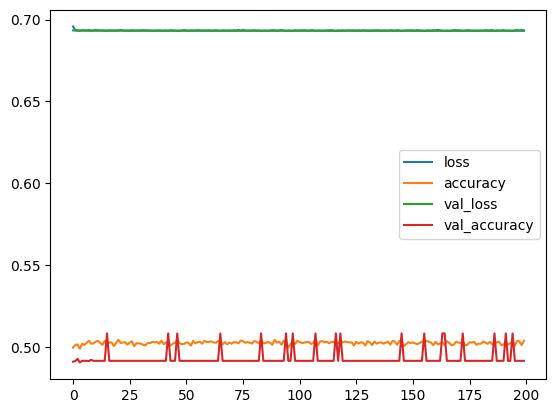

In [26]:
# as the loss and accuracy goes parallely they will take muchmore time to converge with each other
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [27]:
Y_pred = ann.predict(X_test)

625/625 [==============================] - 1s 1ms/step


In [28]:
# Set Threshold
Y_pred = np.where(Y_pred>0.5,1,0)

In [29]:
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

# Classification report

In [30]:
# evaluation
from sklearn.metrics import classification_report
print( classification_report(Y_test,Y_pred) )

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     10020
           1       0.00      0.00      0.00      9980

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.33     20000
weighted avg       0.25      0.50      0.33     20000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
